### Project Name - NETFLIX MOVIES AND TV SHOW UNSUPERVISED LEARNING

#### Project Type   - Unsupervised
#### Contribution   - Individual
###### Name: SREEPRATHAP M

# Project Summary – Clustering Analysis of Netflix Movies and TV Shows
#### Introduction
###### The streaming industry has witnessed explosive growth in recent years, with Netflix emerging as one of the most influential platforms worldwide. Understanding the characteristics and patterns of Netflix’s content library can help in better recommendations, content strategy, and audience targeting. This project applies clustering algorithms to Netflix’s dataset of movies and TV shows to discover underlying patterns and groupings within the content, enabling meaningful insights into content distribution, genre grouping, and language diversity.
#### Objective
###### The main goal of this project is to segment Netflix’s library into distinct clusters based on attributes such as type (Movie or TV Show), genre, release year, rating, and language. By identifying natural groupings, Netflix can better understand its content portfolio, optimize recommendations, and identify gaps or over-representations in its offerings.

# GitHub Link -

https://github.com/sreeprathap/NETFLIX-MOVIES-AND-TV-SHOW-UNSUPERVISED-LEARNING

#### Importing the initial library for EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the Netflix movies and TV shows clustering CSV file and converting to DataFrame ####

In [2]:
data = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df = pd.DataFrame(data)

#### Inspecting the Data frame

In [3]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


## Starting with EDA

In [32]:
# gathering initial information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
print(f'''The number of columns present in given data frame are: {len(df.select_dtypes(include=['object','int']).columns.tolist())}, 
Object columns present are: {len(df.select_dtypes(include=['object']).columns.tolist())} 
and the Integer columns is: {len(df.select_dtypes(include=['int']).columns.tolist())}.

\033[1mThe Object columns name are:\033[0m
----------------------------
{df.select_dtypes(include=['object']).columns.tolist()}

\033[1mand the integer column name is:\033[0m
-------------------------------
{df.select_dtypes(include=['int']).columns.tolist()}

\033[1mThe null value present in dataset are:\033[0m
--------------------------------------
{df.isnull().sum()}

\033[1mThe duplicatd present in data sete:\033[0m
-----------------------------------
{df.duplicated().sum()}

\033[1mThe shape of the data frame is:\033[0m
-------------------------------
{df.shape}

''')

The number of columns present in given data frame are: 12, 
Object columns present are: 11 
and the Integer columns is: 1.

The Object columns name are:
----------------------------
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']

and the integer column name is:
-------------------------------
['release_year']

The null value present in dataset are:
--------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

The duplicatd present in data sete:
-----------------------------------
0

The shape of the data frame is:
-------------------------------
(7787, 12)





----------------------
The null value details
----------------------

         Columns  Null  Percentage
0        show_id     0         0.0
1           type     0         0.0
2          title     0         0.0
3       director  2389        31.0
4           cast   718         9.0
5        country   507         7.0
6     date_added    10         0.0
7   release_year     0         0.0
8         rating     7         0.0
9       duration     0         0.0
10     listed_in     0         0.0
11   description     0         0.0

from provies null value analyze we can exclude the null value rows of 
below 10% of data frame. They are give as below

      Columns  Null  Percentage
4        cast   718         9.0
5     country   507         7.0
6  date_added    10         0.0
8      rating     7         0.0

we can Confidently remove these null-value rows from the data frame



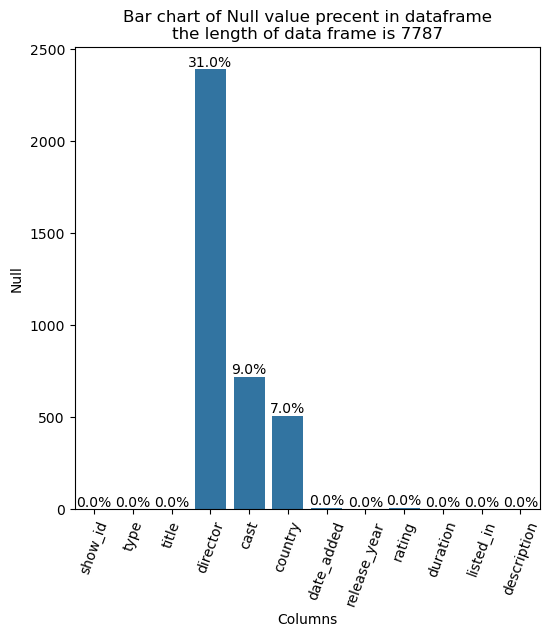

The null vlaue having below 10% are reomved and replaced unkown with 
director column since it hase 30% of null and final non null value data set as below 

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [6]:
df_null=pd.DataFrame(df.isnull().sum()).reset_index()
df_null.columns = ['Columns','Null']
df_null['Percentage'] = (((df_null['Null']/len(df))*100).round(0))
print(f'''
----------------------
\033[1mThe null value details\033[0m
----------------------

{df_null}

from provies null value analyze we can exclude the null value rows of 
below 10% of data frame. They are give as below

{df_null[(df_null['Null'] >0) & (df_null['Percentage']<10)]}

we can Confidently remove these null-value rows from the data frame
''')
plt.figure(figsize=(6,6))
ax=sns.barplot(df_null, x="Columns", y="Null")
ax.bar_label(ax.containers[0], fontsize=10,labels=df_null['Percentage'].astype(str)+"%")
plt.xticks(rotation=70)
plt.title(f'''Bar chart of Null value precent in dataframe
the length of data frame is {len(df)}''')
plt.show()

df1 = df.copy()
df1.dropna(subset=['cast','country','date_added','rating'],inplace=True)
df1.fillna('unkown',inplace=True)
print(f'''The null vlaue having below 10% are reomved and replaced unkown with 
director column since it hase 30% of null and final non null value data set as below 

{df1.isnull().sum()}''')

In [7]:
print(f'''

\033[1mSince the data set is best suted for clustering algoritham I decided to remove some unwanted columns from data frame.
The columns are "show_id" it is unique value column and it produces noise to the clustering algorithm, "title" it is also a unique value column, 
"date_added" this value not deal with usefull content,"duration" it is complex due to mixed data types and "Director" and "cast" are contines to may unique
values\033[0m 
''')
print(f'''
----------------------------------------------------------------
\033[1mThe final Dataset after removing null and unwanted columns is:\033[0m
----------------------------------------------------------------

\033[1mIn first three rows shows that the "listed_in" column contains coma seperated values and same as in "country" column contains 
coma separated values so it should be splited:\033[0m
''')
df2=df1.copy()
df2=df2.drop(columns=['show_id','director','cast','title','date_added','duration'])
df2.head(3)



Since the data set is best suted for clustering algoritham I decided to remove some unwanted columns from data frame.
The columns are "show_id" it is unique value column and it produces noise to the clustering algorithm, "title" it is also a unique value column, 
"date_added" this value not deal with usefull content,"duration" it is complex due to mixed data types and "Director" and "cast" are contines to may unique
values 


----------------------------------------------------------------
The final Dataset after removing null and unwanted columns is:
----------------------------------------------------------------

In first three rows shows that the "listed_in" column contains coma seperated values and same as in "country" column contains 
coma separated values so it should be splited:



,type,country,release_year,rating,listed_in,description
0,TV Show,Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,Mexico,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,Singapore,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


### Data Wragling

### For further analysis,spliting some columns are necessary

##### Spliting the "listed_in" column to new dataframe

In [8]:
df3 = df2['listed_in'].str.split(',', expand=True)

In [9]:
df3.columns = ['listed_in1','listed_in2','listed_in3']
df3=df3.fillna(0)
df3

,listed_in1,listed_in2,listed_in3
0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,Dramas,International Movies,0
2,Horror Movies,International Movies,0
3,Action & Adventure,Independent Movies,Sci-Fi & Fantasy
4,Dramas,0,0
...,...,...,...
7780,Dramas,Independent Movies,International Movies
7781,Children & Family Movies,Comedies,0
7782,Dramas,International Movies,0
7783,Dramas,International Movies,Music & Musicals


##### Spliting the country column to new dataframe

In [10]:
df4 = df2['country'].str.split(',', expand=True)
df4.columns = ['country1','country2','country3','country4','country5','country6','country7','country8']
df4=df4.fillna(0)
df4

,country1,country2,country3,country4,country5,country6,country7,country8
0,Brazil,0,0,0,0,0,0,0
1,Mexico,0,0,0,0,0,0,0
2,Singapore,0,0,0,0,0,0,0
3,United States,0,0,0,0,0,0,0
4,United States,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7780,India,0,0,0,0,0,0,0
7781,United States,0,0,0,0,0,0,0
7782,Sweden,Czech Republic,United Kingdom,Denmark,Netherlands,0,0,0
7783,India,0,0,0,0,0,0,0


##### Merging the splited data frame with original data frame and dropping unwanted columns to further analysis 

In [11]:
df5 = pd.concat([df2,df3,df4],axis=1)
df6=df5.drop(columns=['listed_in','country'])
df6.head(2)

,type,release_year,rating,description,listed_in1,listed_in2,listed_in3,country1,country2,country3,country4,country5,country6,country7,country8
0,TV Show,2020,TV-MA,In a future where the elite inhabit an island ...,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Brazil,0,0,0,0,0,0,0
1,Movie,2016,TV-MA,After a devastating earthquake hits Mexico Cit...,Dramas,International Movies,0,Mexico,0,0,0,0,0,0,0


In [12]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6643 entries, 0 to 7785
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6643 non-null   object
 1   release_year  6643 non-null   int64 
 2   rating        6643 non-null   object
 3   description   6643 non-null   object
 4   listed_in1    6643 non-null   object
 5   listed_in2    6643 non-null   object
 6   listed_in3    6643 non-null   object
 7   country1      6643 non-null   object
 8   country2      6643 non-null   object
 9   country3      6643 non-null   object
 10  country4      6643 non-null   object
 11  country5      6643 non-null   object
 12  country6      6643 non-null   object
 13  country7      6643 non-null   object
 14  country8      6643 non-null   object
dtypes: int64(1), object(14)
memory usage: 830.4+ KB


### Analysis and plotting of features

##### Ploting count plot for the rating column Which rating value has the High number of count

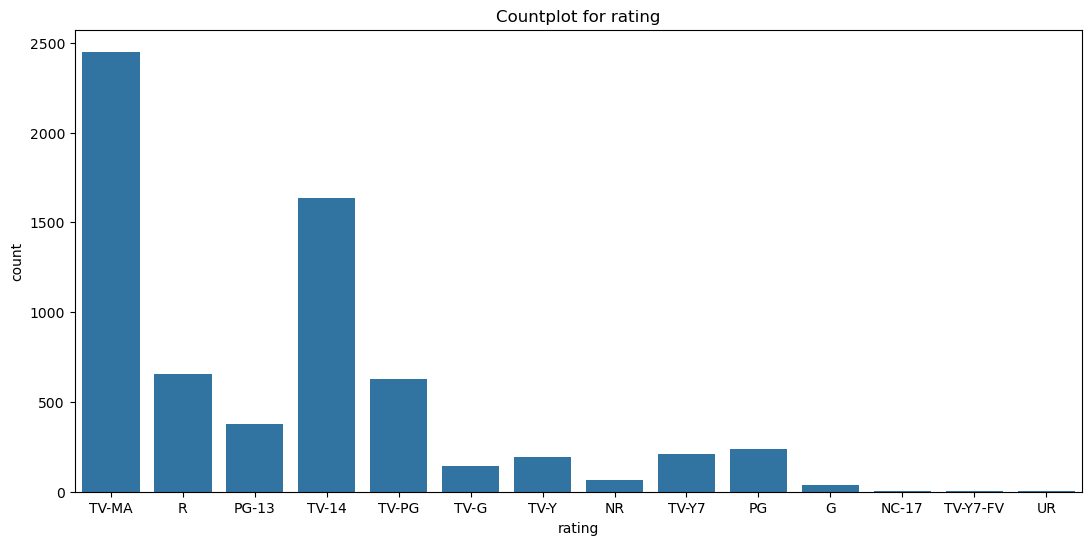

In [13]:
#ploting the count of rating and release_year
plt.figure(figsize=(13,6))
plt.title('Countplot for rating')
sns.countplot(data=df6,x='rating')
plt.show()

#### Ploting Count plote for relase year column to fing which year hase the highest number of releases

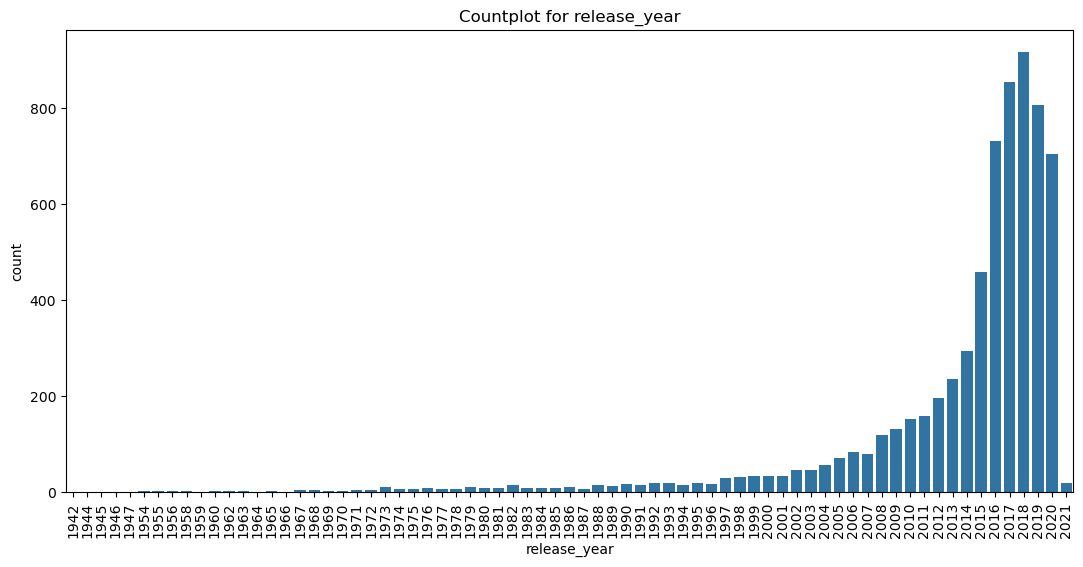

In [14]:
plt.figure(figsize=(13,6))
plt.title('Countplot for release_year')
sns.countplot(data=df6,x='release_year')
plt.xticks(rotation=90)
plt.show()

#### Plotting Count plot for the Listed in as splited columns in which Category has highest value of relases and find featur importents

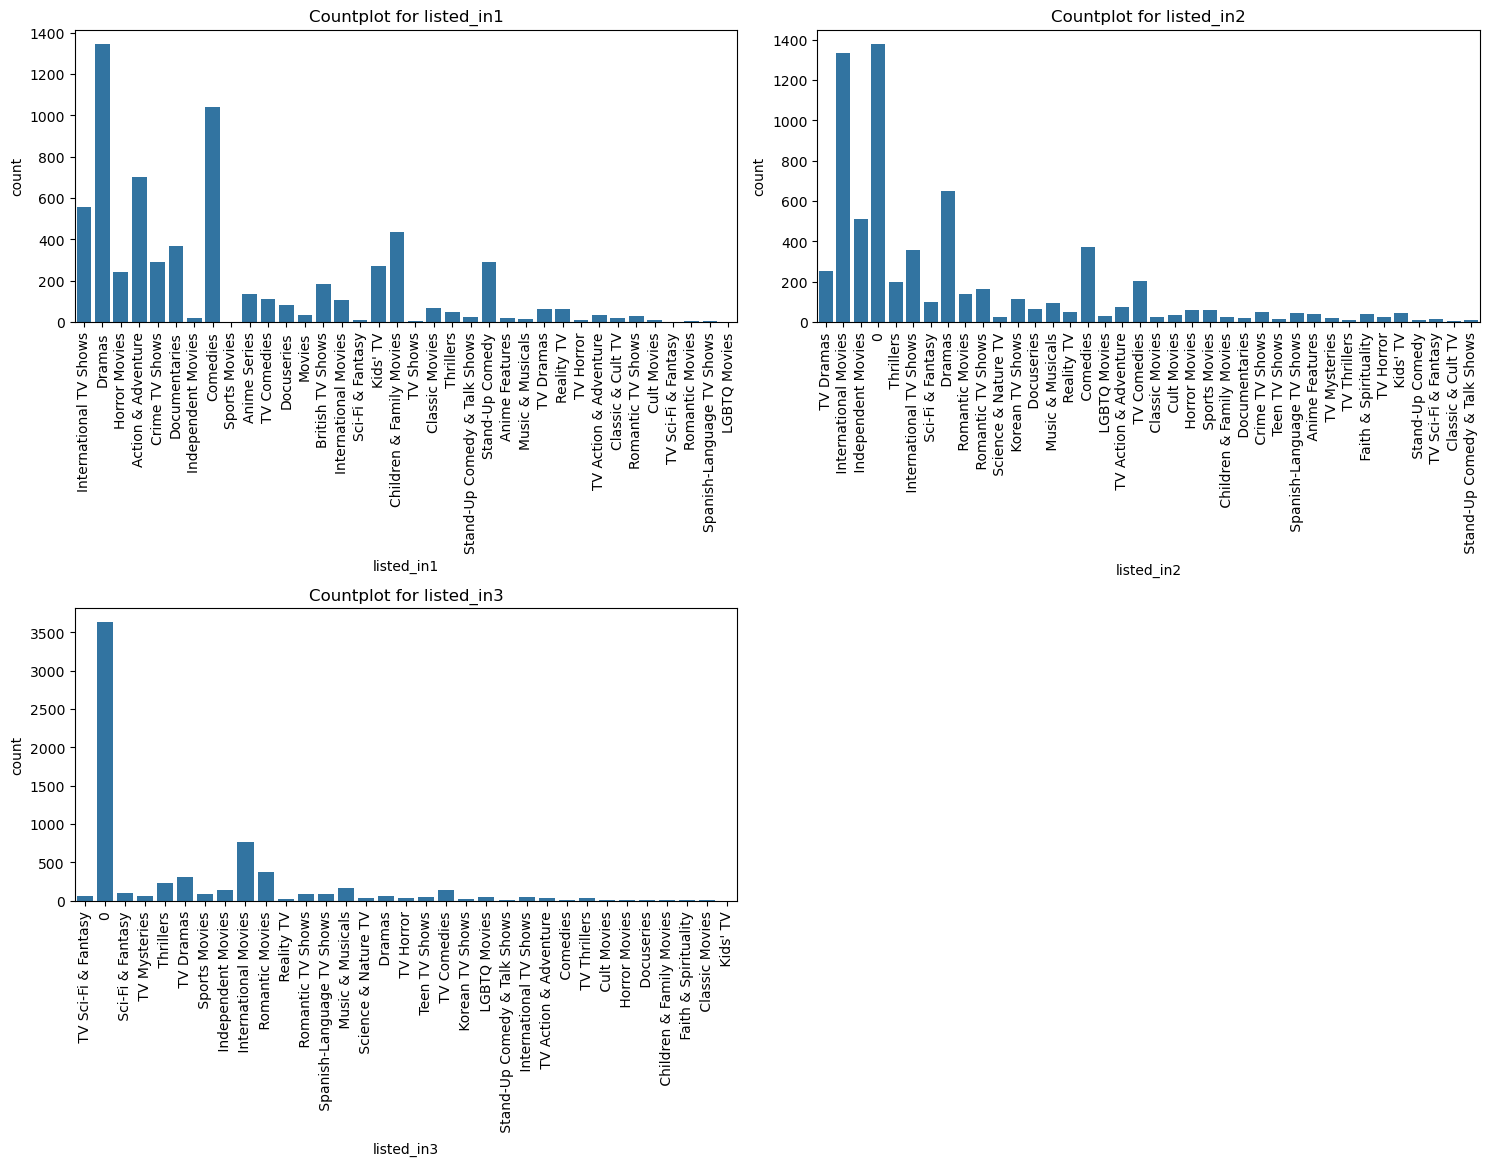

In [15]:
# ploting the count of 3 splited listed_in columns
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.countplot(x='listed_in1',data=df6)
plt.title('Countplot for listed_in1')
plt.xticks(rotation=90)
plt.subplot(3,2,2)
sns.countplot(x='listed_in2',data=df6)
plt.title('Countplot for listed_in2')
plt.xticks(rotation=90)
plt.subplot(3,2,3)
sns.countplot(x='listed_in3',data=df6)
plt.title('Countplot for listed_in3')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Ploting Country column as splited columns to find wich country has high value of reals and find feature importants 

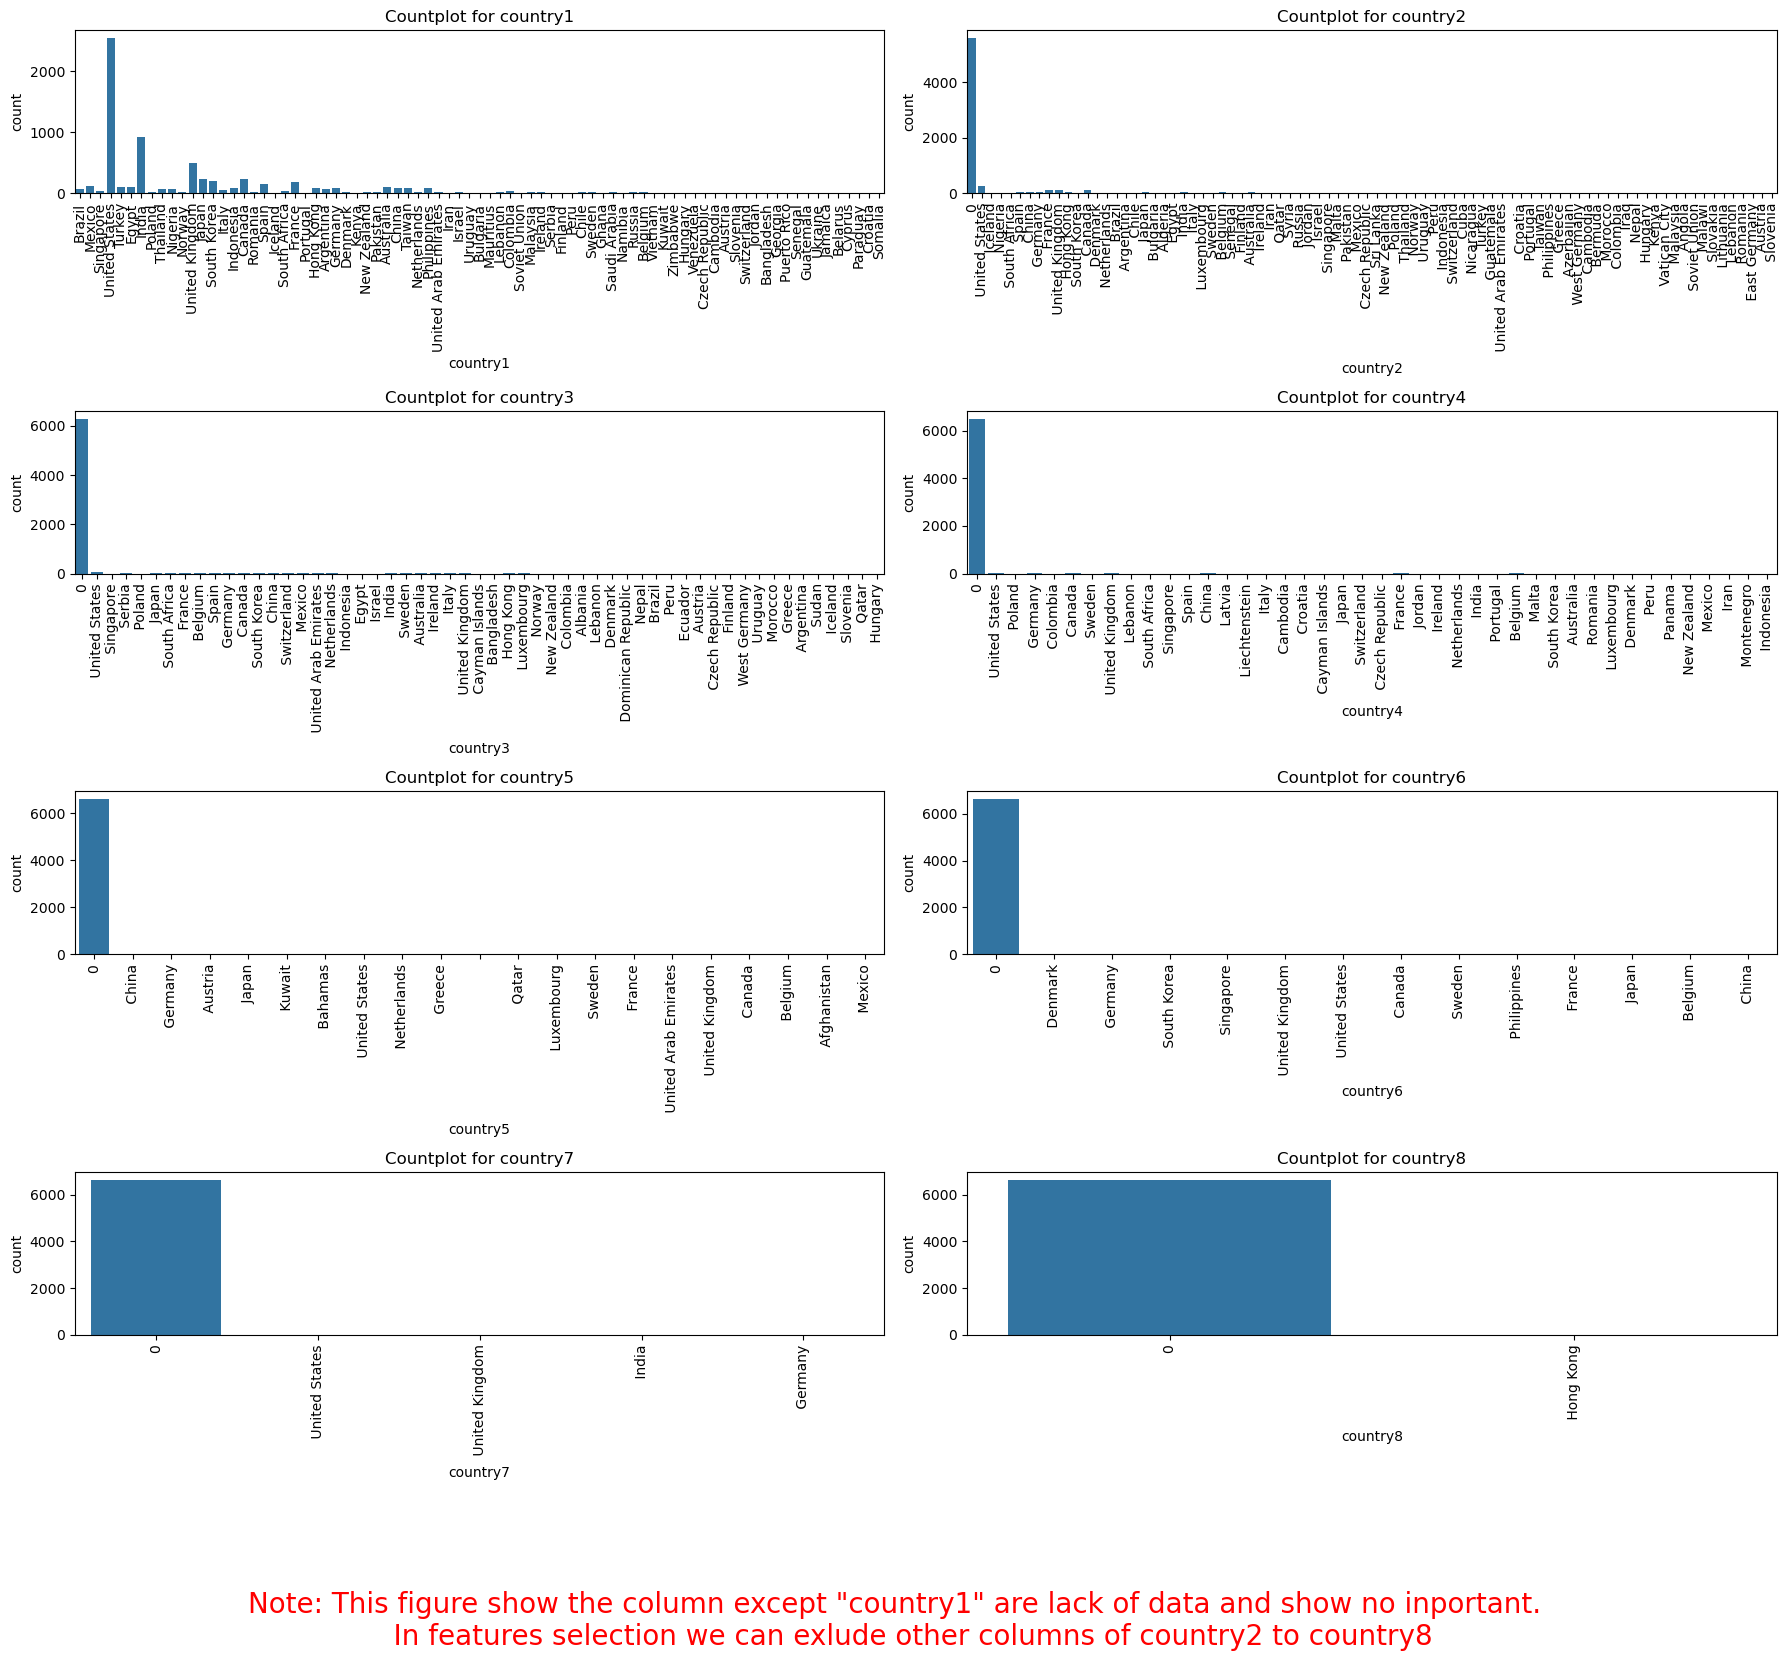

In [16]:
# ploting the count of 8 splited country columns
plt.figure(figsize=(18,15))
plt.subplot(4,2,1)
sns.countplot(x='country1',data=df6)
plt.title('Countplot for country1')
plt.xticks(rotation=90)
plt.subplot(4,2,2)
sns.countplot(x='country2',data=df6)
plt.title('Countplot for country2')
plt.xticks(rotation=90)
plt.subplot(4,2,3)
sns.countplot(x='country3',data=df6)
plt.title('Countplot for country3')
plt.xticks(rotation=90)
plt.subplot(4,2,4)
sns.countplot(x='country4',data=df6)
plt.title('Countplot for country4')
plt.xticks(rotation=90)
plt.subplot(4,2,5)
sns.countplot(x='country5',data=df6)
plt.title('Countplot for country5')
plt.xticks(rotation=90)
plt.subplot(4,2,6)
sns.countplot(x='country6',data=df6)
plt.title('Countplot for country6')
plt.xticks(rotation=90)
plt.subplot(4,2,7)
sns.countplot(x='country7',data=df6)
plt.title('Countplot for country7')
plt.xticks(rotation=90)
plt.subplot(4,2,8)
sns.countplot(x='country8',data=df6)
plt.title('Countplot for country8')
plt.xticks(rotation=90)
plt.tight_layout()
plt.figtext(
    .5, -.1,  # x, y position (relative to figure)
    f'''Note: This figure show the column except "country1" are lack of data and show no inportant.
    In features selection we can exlude other columns of country2 to country8''',
    ha="center", fontsize=20, color="red")
plt.show()

#### Ploting the Description column using worcloude to find high number of word present and find feature importent

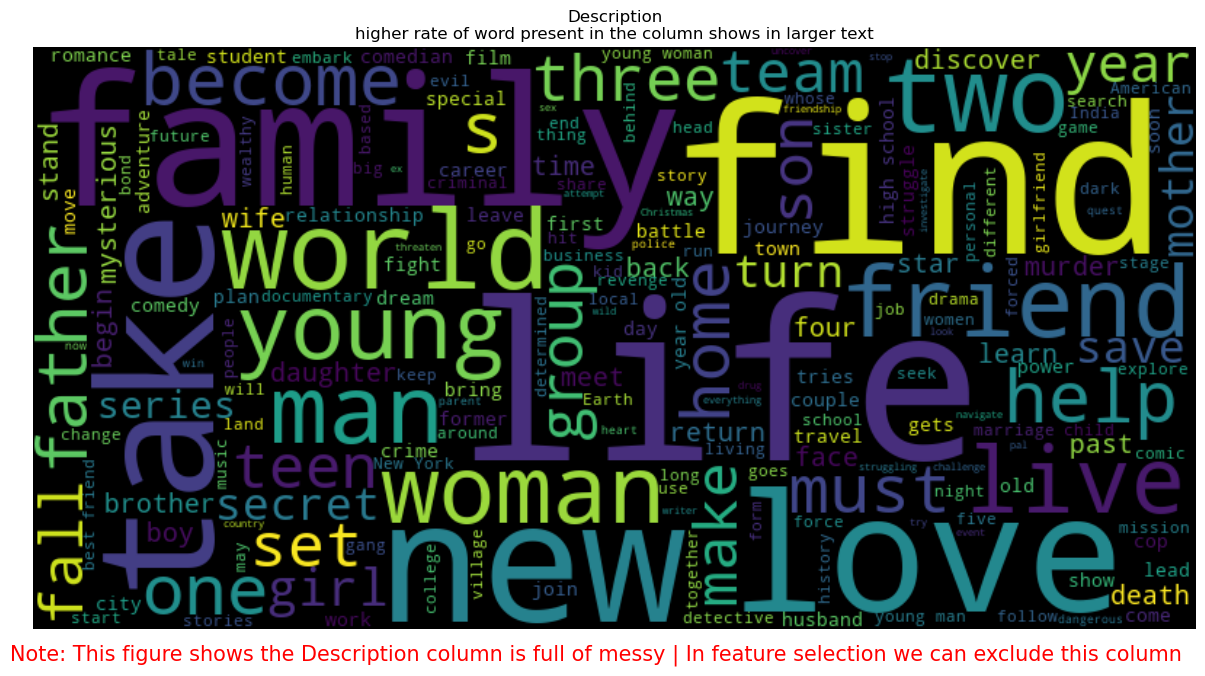

In [17]:
# plting for better visulization of description column using wordcloude module
from wordcloud import WordCloud
text = ' '.join(df6['description'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'''Description
higher rate of word present in the column shows in larger text''')
plt.axis('off')
plt.figtext(
    .5, .28,  # x, y position (relative to figure)
    "Note: This figure shows the Description column is full of messy | In feature selection we can exclude this column",
    ha="center", fontsize=15, color="red"
)
plt.show()

In [18]:
#Separate numerical and categorical columns
num_cols = ['release_year']
cat_cols = ['type', 'rating', 'listed_in1', 'listed_in2', 'listed_in3', 'country1']

### Final EDA for Clustering the Data Frame

In [19]:
# importing modules for Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Finalized Features

In [20]:
## Feature selection
features = ['release_year', 'type', 'rating', 'listed_in1', 'listed_in2', 'listed_in3', 'country1']
df_cluster = df6[features].copy()

In [21]:
# final renamed Data frame for Clustering Analysis
df_cluster.head(4)

,release_year,type,rating,listed_in1,listed_in2,listed_in3,country1
0,2020,TV Show,TV-MA,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Brazil
1,2016,Movie,TV-MA,Dramas,International Movies,0,Mexico
2,2011,Movie,R,Horror Movies,International Movies,0,Singapore
3,2009,Movie,PG-13,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,United States


In [22]:
# information about final Clustering data frame
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6643 entries, 0 to 7785
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_year  6643 non-null   int64 
 1   type          6643 non-null   object
 2   rating        6643 non-null   object
 3   listed_in1    6643 non-null   object
 4   listed_in2    6643 non-null   object
 5   listed_in3    6643 non-null   object
 6   country1      6643 non-null   object
dtypes: int64(1), object(6)
memory usage: 415.2+ KB


In [23]:
# finding null value for clustering data frame
df_cluster.isnull().sum()

release_year    0
type            0
rating          0
listed_in1      0
listed_in2      0
listed_in3      0
country1        0
dtype: int64

In [24]:
# To find out any object columns contains mixed string as int, then converting into str
mixed_cols = [col for col in df_cluster.columns if df_cluster[col].map(type).nunique() > 1]
print(mixed_cols)

for col in mixed_cols:
    df_cluster[col] = df_cluster[col].astype(str)

['listed_in2', 'listed_in3']


In [25]:
# Separate numerical and categorical columns
categorical_cols = df_cluster.select_dtypes(include=['object']).columns
numerical_cols = df_cluster.select_dtypes(exclude=['object']).columns

#### Encoding

In [27]:
# Preprocessing: One-Hot Encode categorical & Scale numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

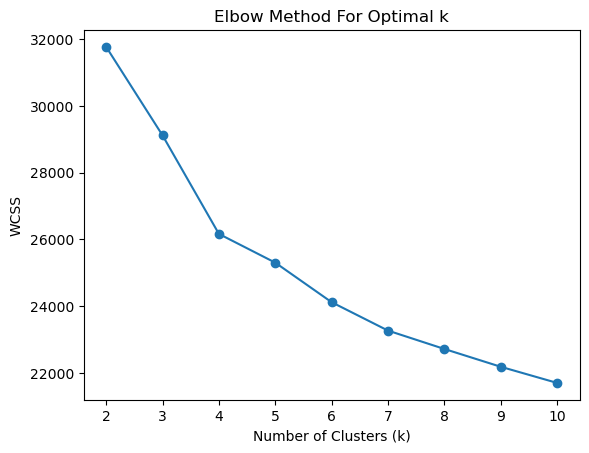

In [28]:
# Elbow Method to find optimal k
X_preprocessed = preprocessor.fit_transform(df_cluster)

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
# Run K-Means with chosen k = 4 
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_preprocessed)

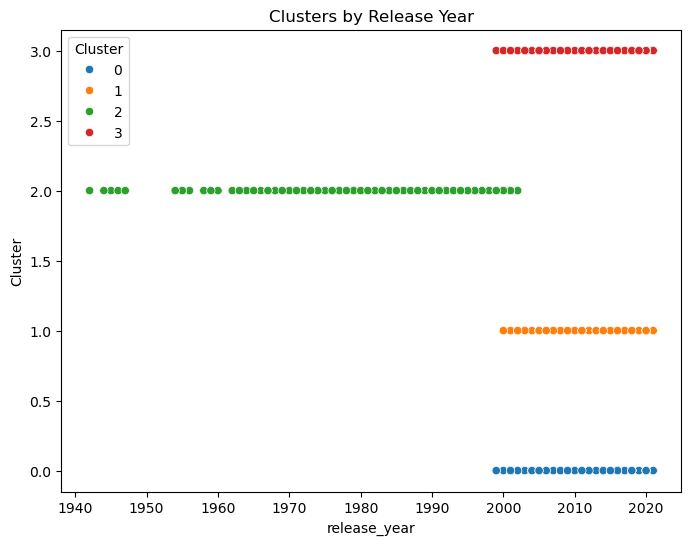

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='release_year', y='Cluster', data=df_cluster, hue='Cluster', palette='tab10')
plt.title("Clusters by Release Year")
plt.show()

In [31]:
df_cluster.to_csv("netflix_clustered.csv", index=False)
print("Clustering completed and saved to netflix_clustered.csv")

Clustering completed and saved to netflix_clustered.csv


#### Hypothesis Testing for Clustering Analysis
##### 1. Objective
###### To determine whether the clusters identified in the dataset represent significantly different groups in terms of features (release year).

#### 2. Hypotheses Formulation
###### Since clustering is unsupervised, our hypotheses revolve around feature differences between clusters.

#### Null Hypothesis (H₀):
###### There is no statistically significant difference between the clusters for the selected feature(s).

#### Alternative Hypothesis (H₁):
###### There is a statistically significant difference between at least two clusters for the selected feature(s).

In [35]:
from scipy.stats import f_oneway, kruskal, chi2_contingency

# Loaded data with cluster labels
cdf = pd.read_csv("netflix_clustered.csv")

# ANOVA for numeric feature 'release_year'
clusters = cdf['Cluster'].unique()
release_year_groups = [cdf[cdf['Cluster'] == c]['release_year'] for c in clusters]

anova_result = f_oneway(*release_year_groups)
print("ANOVA p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("Reject H₀: Significant difference in release_year between clusters.")
else:
    print("Fail to reject H₀: No significant difference.")

ANOVA p-value: 0.0
Reject H₀: Significant difference in release_year between clusters.
